In [16]:
import logging
logging.basicConfig(filename="5AprInfo.log", level=logging.INFO, format="%(asctime)s %(name)s %(message)s")

1. **Pregnancies**: Number of times pregnant. **(integer value)**
2. **Glucose**: Plasma glucose concentration for **2 hours** in an **oral glucose tolerance test. (integer value)**
3. **BloodPressure**: Diastolic blood pressure. **(measured in mmHg, integer value)**
4. **SkinThickness**: Triceps skin fold thickness. **(measured in mm, integer value)**
5. **Insulin**: 2-Hour serum insulin. **(measured in muU/ml, integer value)**
6. **BMI**: Body mass index. **(measured in: weight in kg or square of height in m, float value)**
7. **DiabetesPedigreeFunction**: A **function** which scores **likelihood of diabetes** based on **family history. (float value)**
8. **Age**: Age in years. **(integer value)**
9. **Outcome**: A **Class variable** where it shows that if a **person is non-diabetic**, then the **value will be ZERO**. Otherwise, if a **person is diabetic**, then the **value will be 1**. **(integer value)**

In [17]:
# importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# answer 1

In [18]:
df=pd.read_csv("/kaggle/input/diabetescsv/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

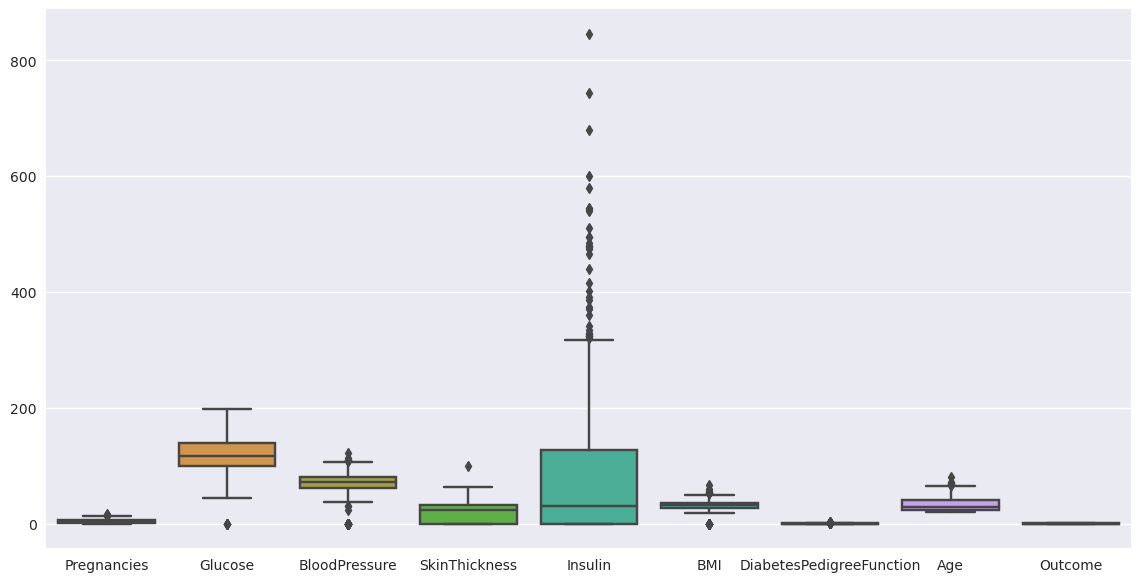

In [22]:
# visualisations
fig,axis=plt.subplots(figsize=(14,7))
sns.boxplot(df)

In [23]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

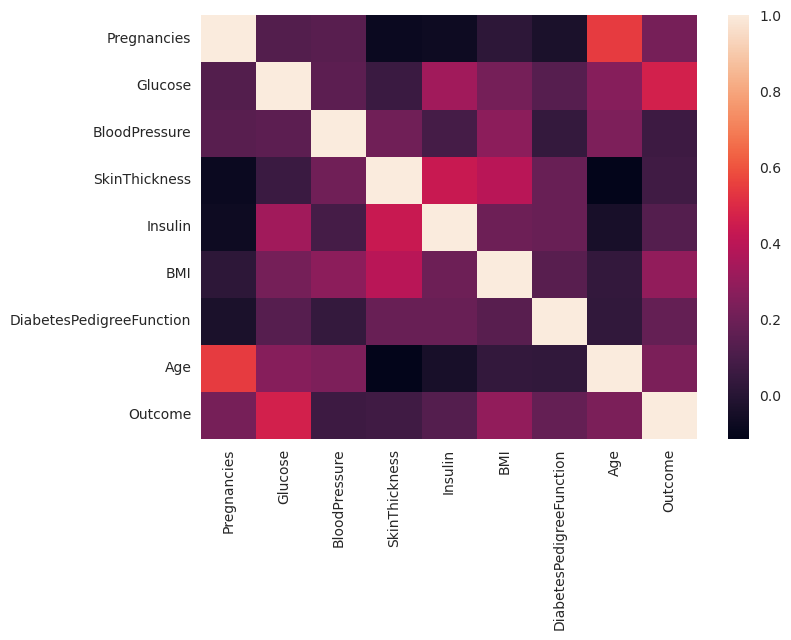

In [24]:
sns.heatmap(df.corr())

# answer 2

- There are no missing values
- All the values are numerical
- BMI can not be zero
- BP can't be zero, glucose, etc. can't be zero 
- pregnancy can be zero

In [25]:
# replacing zeroes with the median of the column
df['BMI'] = df['BMI'].replace(0,df['BMI'].median())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].median())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].median())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].median())

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

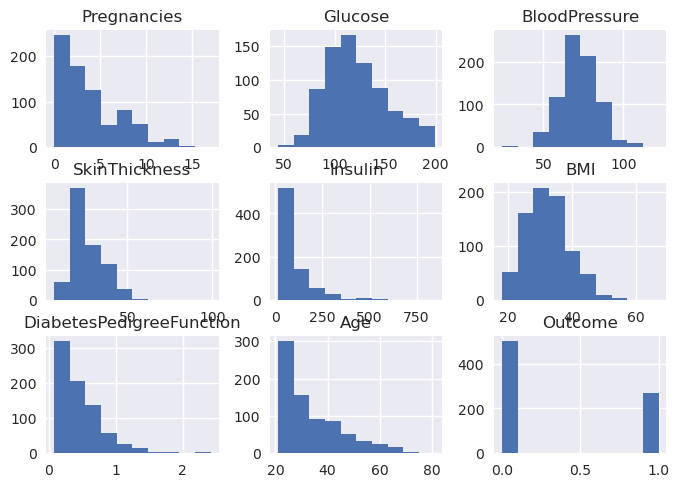

In [26]:
df.hist()

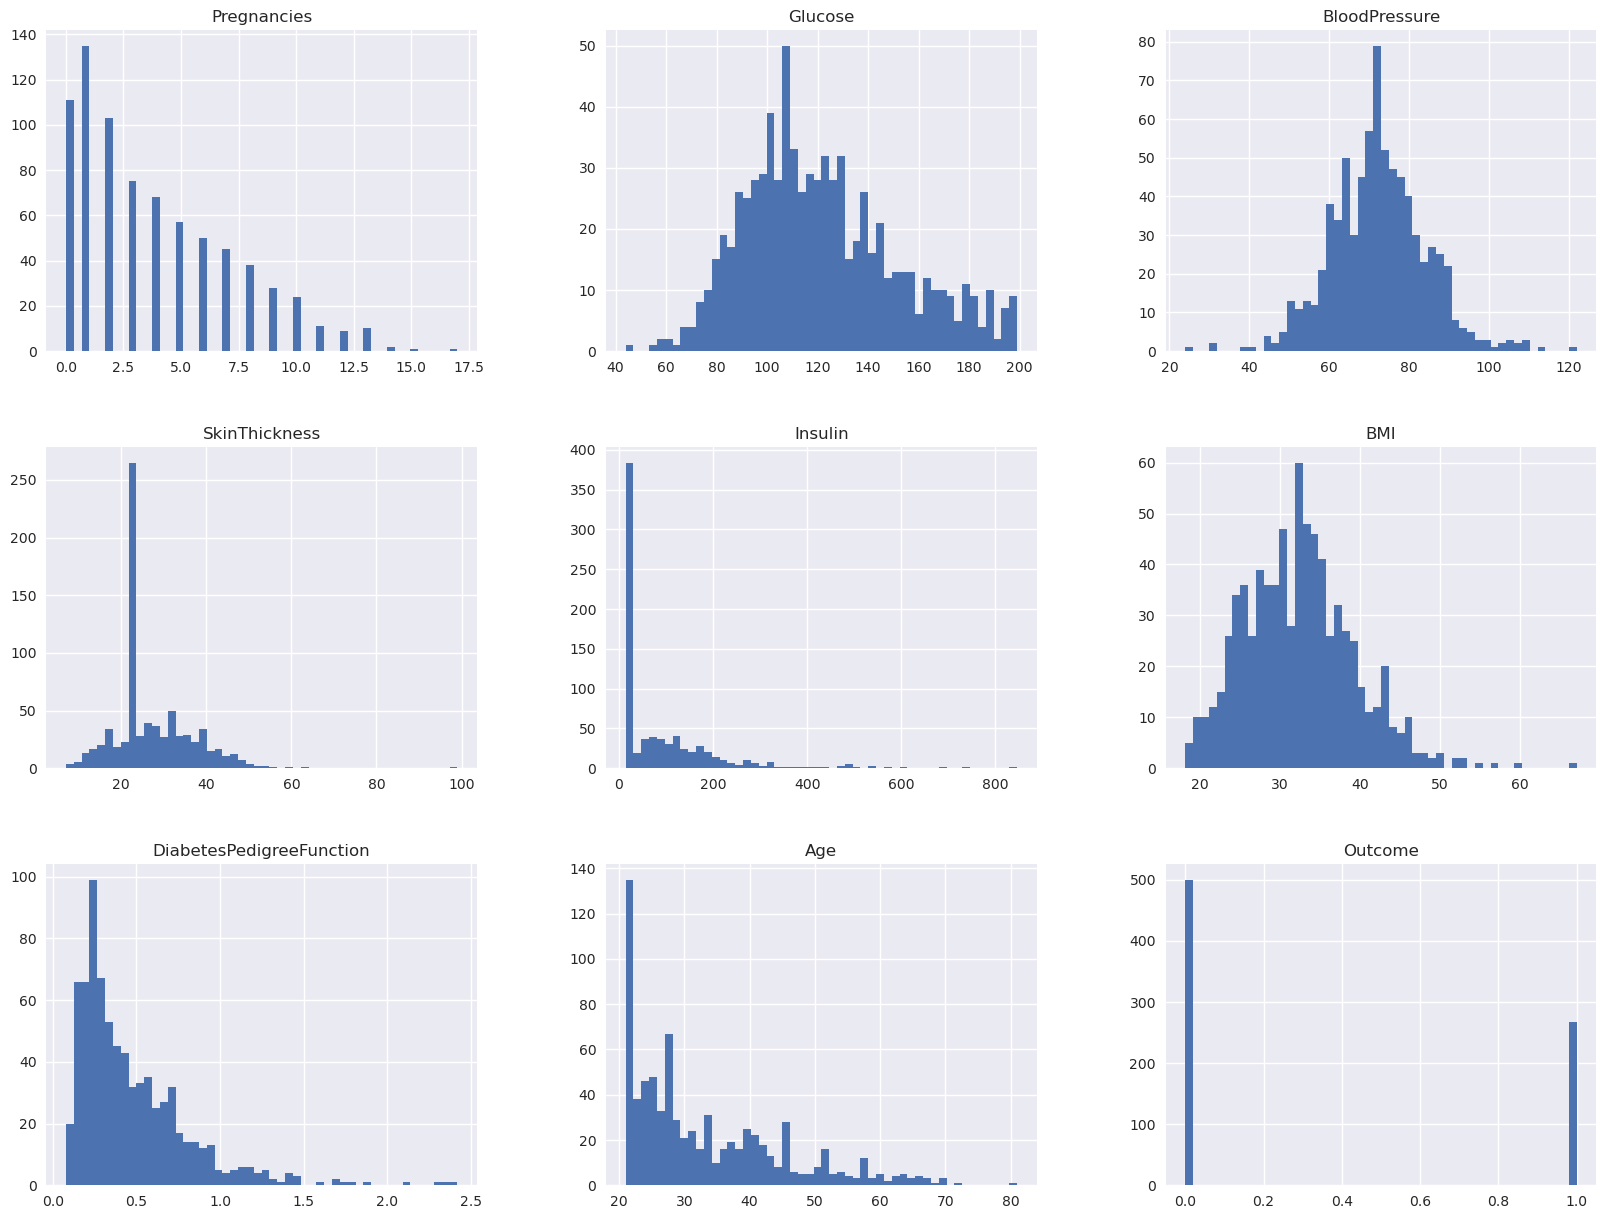

In [27]:
## Plot desnity plot for all features
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15))
plt.show()

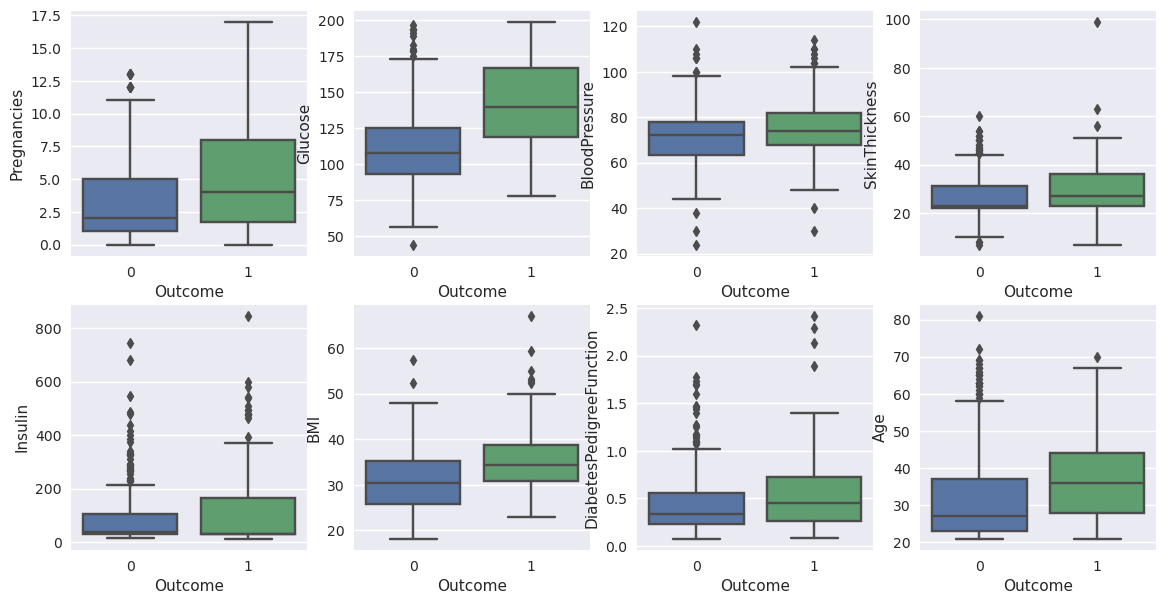

In [28]:
### Explore More Visualization
fig,axis=plt.subplots(2,4,figsize=(14,7))
x=1
for col in df.columns:
  no="24"+str(x)
  plt.subplot(int(no))
  sns.boxplot(x="Outcome", y=col, data=df)
  x=x+1
  if x>=9:
    break

In [29]:
cols=df.columns[:-1]
# Loop through each column in the range
for col in cols:
    # Calculate the IQR of the column
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

<AxesSubplot:>

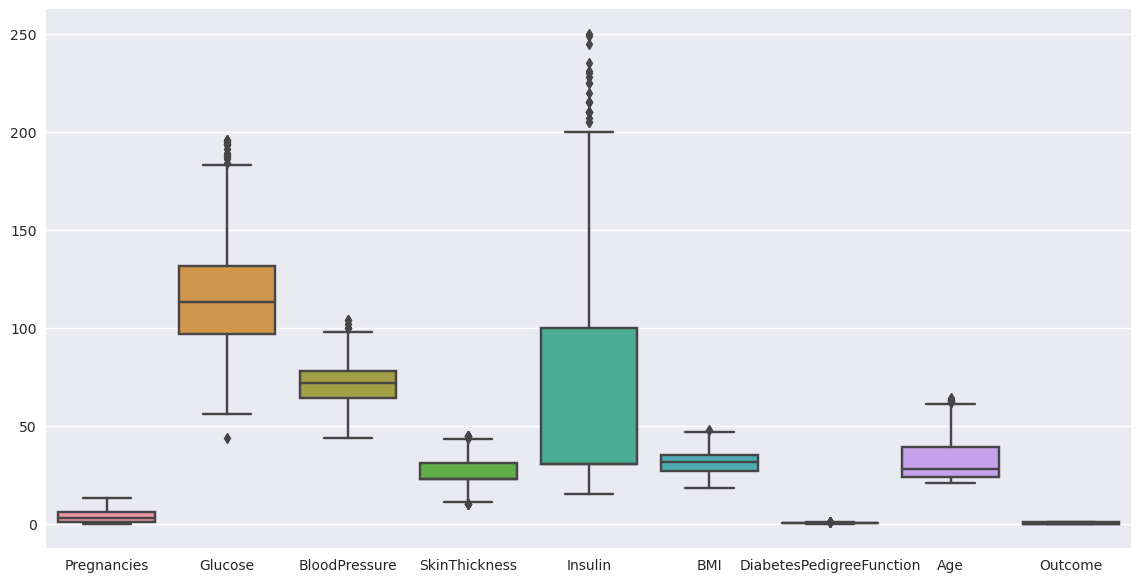

In [30]:
# visualisations
# data=df.iloc[:,:-1]
fig,axis=plt.subplots(figsize=(14,7))
sns.boxplot(df)

# answer 3

In [31]:
# Split the data into features (X) and target (y)
X = df.drop(columns = ['Outcome'])
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=423)

# answer 4

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
# clf=GridSearchCV(classifier,param_grid=parameter,cv=3,scoring='accuracy',verbose=3)
# clf.fit(X_train,y_train)

In [34]:
# Train the decision tree model using the ID3 algorithm
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)

# Evaluate the performance of the decision tree model on the testing set
accuracy = dt.score(X_test, y_test)
print("Accuracy: ", accuracy)

#  params fir Cross-validation
param_grid={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
}

# Optimize the hyperparameters of the decision tree model using cross-validation
dt_cv = DecisionTreeClassifier()
grid = GridSearchCV(dt_cv, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

# Print the best hyperparameters found by cross-validation
print("Best Hyperparameters: ", grid.best_params_)

# Train the decision tree model using the best hyperparameters found by cross-validation
dt = DecisionTreeClassifier(criterion=grid.best_params_['criterion'],splitter=grid.best_params_['splitter'] ,max_depth=grid.best_params_['max_depth'], max_features=grid.best_params_['max_features'])
dt.fit(X_train, y_train)

# Evaluate the performance of the decision tree model on the testing set
accuracy = dt.score(X_test, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.7207792207792207
Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'splitter': 'best'}
Accuracy:  0.7597402597402597


# answer 5

In [35]:
from sklearn import metrics

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.7597402597402597
Precision: 0.64
Recall: 0.6274509803921569
F1 Score: 0.6336633663366336


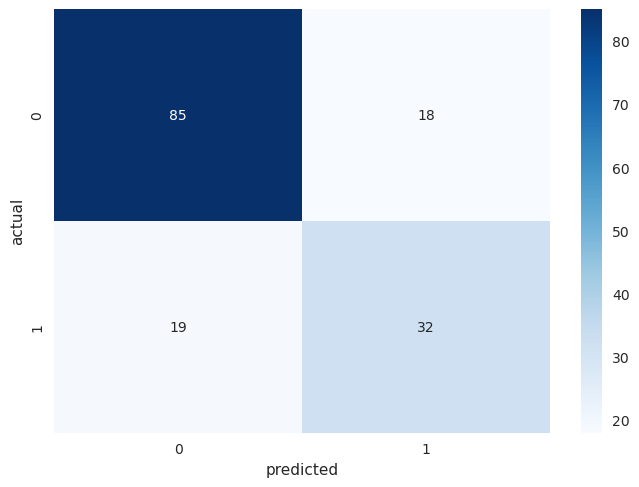

In [36]:
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

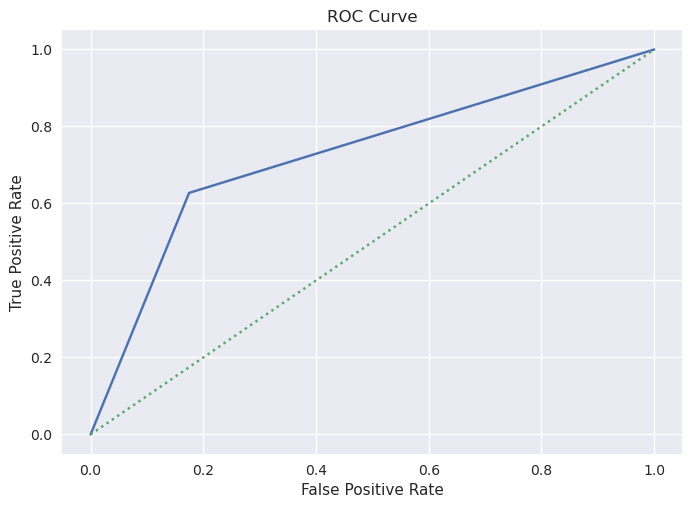

In [37]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

# Calculate the AUC (area under the curve) of the ROC curve
auc = metrics.roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle=":")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

# answer 7

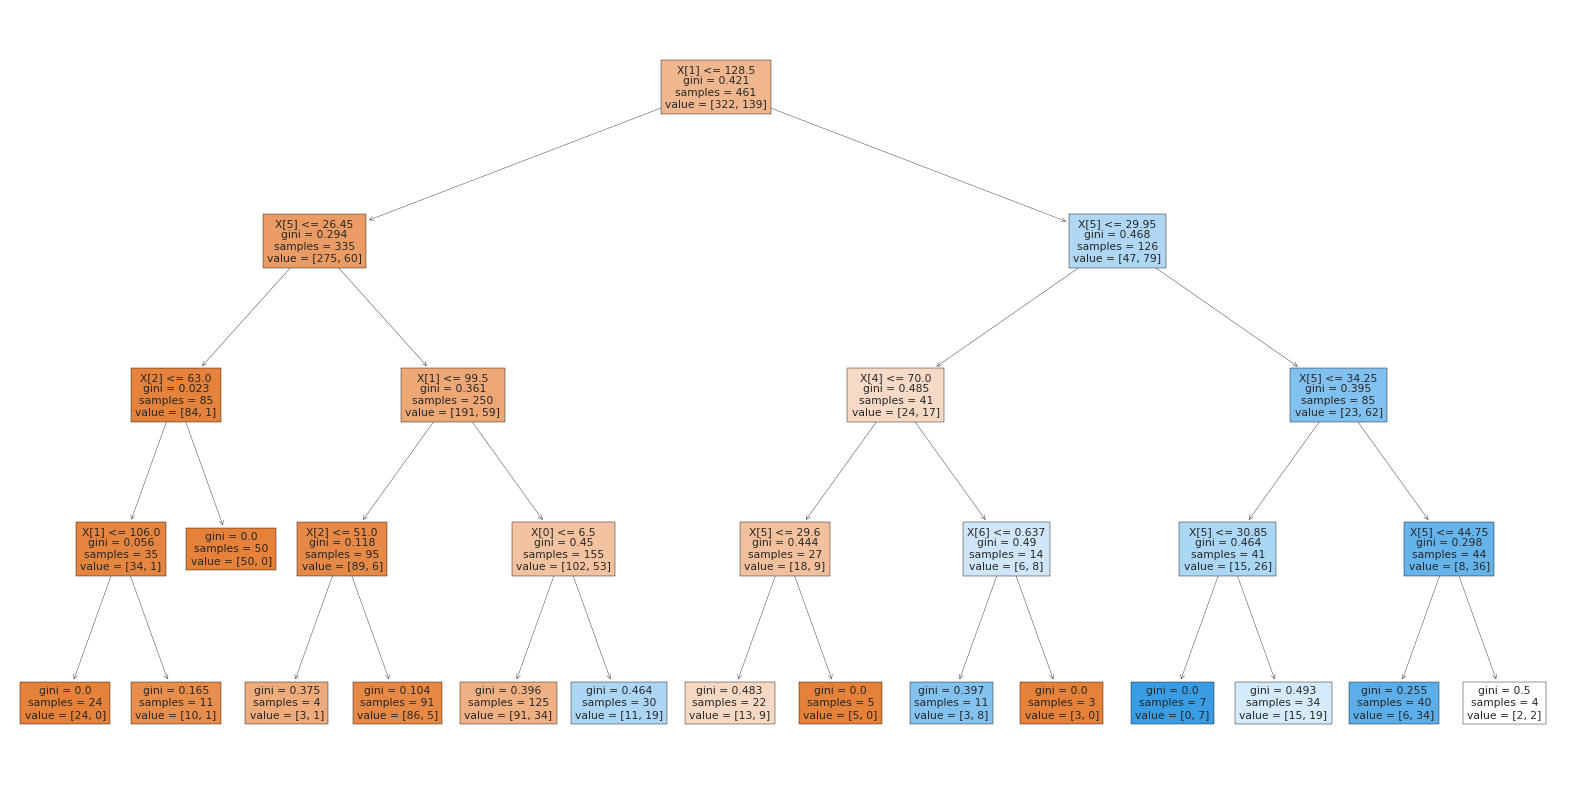

In [38]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(dt, filled=True, ax=ax)
plt.show()